`March 31, 2022`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score

# Encoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import category_encoders as ce

from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [4]:
# df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


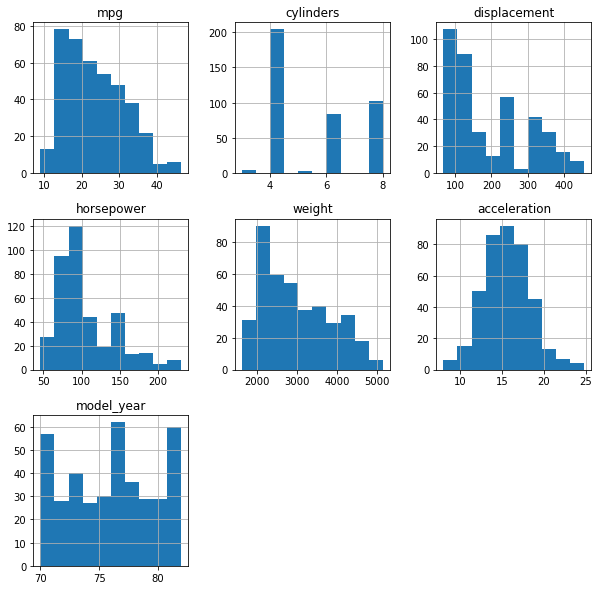

In [5]:
df.hist(figsize=(10, 10));

Features to be used:
- cylinders
- horsepower
- origin
- model_year

**Modeling**

In [6]:
df.drop('name', axis=1, inplace=True)

In [7]:
# df = pd.get_dummies(df, drop_first=True)
# df.head()

In [8]:
# df[df['horsepower'].isna()]

In [9]:
# df[df['horsepower'].isna()].index

In [10]:
# # KNN imputer
# knn_imputer = KNNImputer()
# pd.DataFrame(knn_imputer.fit_transform(df[['cylinders', 'displacement', 'horsepower', 'weight',
#                                     'acceleration', 'model_year']])).iloc[df[df['horsepower'].isna()].index]


In [11]:
# Impute missing values.
knn_imputer = KNNImputer()
df['horsepower'] = knn_imputer.fit_transform(df[['horsepower']])

In [12]:
df['horsepower'].isna().any()

False

In [13]:
transformer = ColumnTransformer([
                                 ('encoder', OneHotEncoder(drop='first'), ['origin'])
                                ], remainder='passthrough')

In [14]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(drop='first'),
                                 ['origin'])])

In [15]:
# Define X and y.
X = df[['cylinders', 'horsepower', 'origin', 'model_year', 'weight']]
y = df['mpg']

In [16]:
# Splitting data.
X_train, X_test, y_train, y_test = train_test_split(
                                                    X, 
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)

In [17]:
X_train

,cylinders,horsepower,origin,model_year,weight
3,8,150.0,usa,70,3433
18,4,88.0,japan,70,2130
376,4,68.0,japan,82,2025
248,4,60.0,japan,78,1800
177,4,95.0,europe,75,2694
...,...,...,...,...,...
71,3,97.0,japan,72,2330
106,8,180.0,usa,73,4499
270,4,95.0,japan,78,2515
348,4,62.0,japan,81,2050


In [18]:
# encode origin
onehot_encoder = OneHotEncoder(drop='first')
# origin_encoded_train = onehot_encoder.fit_transform(df[['origin']]).toarray()
# origin_encoded_test = onehot_encoder.transform(df[['origin']]).toarray()

In [19]:
# # encode model_year
# ordinal_encoder = OrdinalEncoder(categories=[df['model_year'].sort_values().unique()])
# model_year_encoded_train = ordinal_encoder.fit_transform(df[['model_year']])

In [20]:
# pd.DataFrame({
#     'model_year': df['model_year'],
#     'model_year_encoded': model_year_encoded_train[:, 0]
# }).drop_duplicates().sort_values(by='model_year').astype('int')

In [21]:
X_train_prep = transformer.fit_transform(X_train)
X_test_prep = transformer.transform(X_test)

In [22]:
# Scale numerical features.
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train_prep)
X_test_scaled = scaler.transform(X_test_prep)

In [23]:
X_train_scaled

array([[0.        , 1.        , 1.        , 0.58100559, 0.        ,
        0.51601928],
       [1.        , 0.        , 0.2       , 0.23463687, 0.        ,
        0.1465835 ],
       [1.        , 0.        , 0.2       , 0.12290503, 1.        ,
        0.11681316],
       ...,
       [1.        , 0.        , 0.2       , 0.27374302, 0.66666667,
        0.25574142],
       [1.        , 0.        , 0.2       , 0.08938547, 0.91666667,
        0.12390133],
       [0.        , 0.        , 0.2       , 0.        , 0.25      ,
        0.09554862]])

In [24]:
# Define models
linreg = LinearRegression()
ridge = Ridge(random_state=42)
lasso = Lasso(random_state=42)
tree_reg = DecisionTreeRegressor(random_state=42)
knn_reg = KNeighborsRegressor()

In [25]:
# Fitting model
linreg.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)
tree_reg.fit(X_train_scaled, y_train)
knn_reg.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [26]:
# Predict

models = [linreg, ridge, lasso, tree_reg, knn_reg]

for model in models:
    print('================================')
    print(model.__class__.__name__)
    print()

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    print('Train set r-squared:', model.score(X_train_scaled, y_train))
    print('Test set r-squared:', model.score(X_test_scaled, y_test))
    print()
    print('Train set RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print('Test set RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

LinearRegression

Train set r-squared: 0.8158636040361795
Test set r-squared: 0.8332558127965364

Train set RMSE: 3.3977428455149927
Test set RMSE: 2.994201389672128
Ridge

Train set r-squared: 0.811323259022134
Test set r-squared: 0.8427340652534349

Train set RMSE: 3.439377694480798
Test set RMSE: 2.9078566048452883
Lasso

Train set r-squared: 0.4874593582108051
Test set r-squared: 0.5359162190534688

Train set RMSE: 5.668717853022696
Test set RMSE: 4.995211157053223
DecisionTreeRegressor

Train set r-squared: 0.9991563593517117
Test set r-squared: 0.7531452877613838

Train set RMSE: 0.22998495985826195
Test set RMSE: 3.6431442463893737
KNeighborsRegressor

Train set r-squared: 0.9010010069253245
Test set r-squared: 0.8789760016441481

Train set RMSE: 2.4913576405409485
Test set RMSE: 2.5508880806495613


In [27]:
lasso.coef_

array([ 0.        , -2.00556709, -7.28067354, -0.        ,  0.78966884,
       -0.        ])

In [28]:
lasso.intercept_

27.98224636587691

In [29]:
ridge.coef_

array([  0.15294024,  -2.44679346,  -0.74297965,  -3.4276884 ,
         9.08170709, -16.42809468])

In [30]:
k_range = range(1, 25, 2)

df_result = pd.DataFrame(columns=['k', 'train_r2', 'test_r2'])
for k in k_range:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train_prep, y_train)
    df_result = df_result.append({
        'k': k,
        'train_r2': knn_model.score(X_train_prep, y_train),
        'test_r2': knn_model.score(X_test_prep, y_test)
    }, ignore_index=True)
    
df_result

,k,train_r2,test_r2
0,1.0,0.998313,0.728404
1,3.0,0.831332,0.780267
2,5.0,0.800523,0.785055
3,7.0,0.773041,0.795040
4,9.0,0.760780,0.787972
5,11.0,0.740977,0.784878
6,13.0,0.736362,0.784768
7,15.0,0.724823,0.781369
8,17.0,0.722801,0.771558
9,19.0,0.717602,0.766972


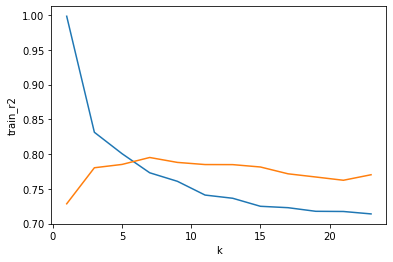

In [31]:
sns.lineplot(x='k', y='train_r2', data=df_result)
sns.lineplot(x='k', y='test_r2', data=df_result);

**`Feature Selection`**

In [32]:
X_train_scaled

array([[0.        , 1.        , 1.        , 0.58100559, 0.        ,
        0.51601928],
       [1.        , 0.        , 0.2       , 0.23463687, 0.        ,
        0.1465835 ],
       [1.        , 0.        , 0.2       , 0.12290503, 1.        ,
        0.11681316],
       ...,
       [1.        , 0.        , 0.2       , 0.27374302, 0.66666667,
        0.25574142],
       [1.        , 0.        , 0.2       , 0.08938547, 0.91666667,
        0.12390133],
       [0.        , 0.        , 0.2       , 0.        , 0.25      ,
        0.09554862]])

In [33]:
# Model based approach
# For a model base, only use a model that has feature importance or coeff.

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [34]:
lin_reg.score(X_train_scaled, y_train)

0.8158636040361795

In [35]:
lin_reg.coef_

array([ -0.25515974,  -2.44691492,   1.86262214,  -1.51923749,
         9.74810907, -22.08974961])

In [36]:
transformer.get_feature_names()

['encoder__x0_japan',
 'encoder__x0_usa',
 'cylinders',
 'horsepower',
 'model_year',
 'weight']

In [37]:
prep_cols = transformer.get_feature_names()

df_importance = pd.DataFrame({
                                'col': prep_cols,
                                'coef': lin_reg.coef_,
                                'coef_abs': np.abs(lin_reg.coef_)
})

df_importance

,col,coef,coef_abs
0,encoder__x0_japan,-0.255160,0.255160
1,encoder__x0_usa,-2.446915,2.446915
2,cylinders,1.862622,1.862622
3,horsepower,-1.519237,1.519237
4,model_year,9.748109,9.748109
5,weight,-22.089750,22.089750


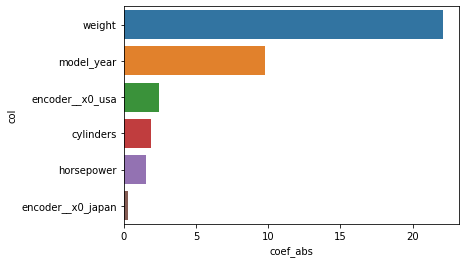

In [38]:
sns.barplot(x='coef_abs', y='col', data=df_importance, order=df_importance.sort_values('coef_abs', ascending=False).col);

In [39]:
X_train_scaled[:, [0, 1, 3]]

array([[0.        , 1.        , 0.58100559],
       [1.        , 0.        , 0.23463687],
       [1.        , 0.        , 0.12290503],
       [1.        , 0.        , 0.07821229],
       [0.        , 0.        , 0.27374302],
       [0.        , 1.        , 0.72067039],
       [1.        , 0.        , 0.03351955],
       [0.        , 1.        , 0.10614525],
       [1.        , 0.        , 0.23463687],
       [0.        , 1.        , 0.84916201],
       [0.        , 1.        , 0.80446927],
       [1.        , 0.        , 0.30167598],
       [0.        , 0.        , 0.16201117],
       [0.        , 0.        , 0.06703911],
       [1.        , 0.        , 0.34636872],
       [0.        , 1.        , 0.09497207],
       [0.        , 1.        , 0.2122905 ],
       [0.        , 1.        , 0.38547486],
       [0.        , 1.        , 0.32960894],
       [0.        , 1.        , 0.58100559],
       [0.        , 1.        , 0.11173184],
       [1.        , 0.        , 0.26815642],
       [0.

In [40]:
X_train_selected = X_train_scaled[:, [0, 1, 3]]
X_test_selected = X_test_scaled[:, [0, 1, 3]]

lin_reg = LinearRegression()
lin_reg.fit(X_train_selected, y_train)

LinearRegression()

In [41]:
lin_reg.score(X_train_selected, y_train)

0.64386305863182

In [42]:
yhat = lin_reg.predict(X_test_selected)

In [43]:
lin_reg.score(X_test_selected, y_test)

0.6865183639753243

In [44]:
pd.DataFrame({'y_test': y_test,
                'y_hat': yhat})

,y_test,y_hat
198,33.0,34.061258
396,28.0,25.242652
33,19.0,22.393891
208,13.0,15.611126
93,14.0,15.611126
...,...,...
249,19.9,21.037338
225,17.5,21.037338
367,28.0,24.021754
175,29.0,29.666841


In [45]:
np.sqrt(mean_squared_error(y_test, yhat))

4.105458896393764

`Model Based`

In [46]:
from sklearn.feature_selection import SelectPercentile, SelectKBest, RFE, mutual_info_regression, SelectFromModel

In [47]:
feature_model = SelectFromModel(LinearRegression())
X_train_selected_from_model = feature_model.fit_transform(X_train_scaled, y_train)

In [48]:
transformer.get_feature_names()

['encoder__x0_japan',
 'encoder__x0_usa',
 'cylinders',
 'horsepower',
 'model_year',
 'weight']

In [49]:
feature_model.get_support()

array([False, False, False, False,  True,  True])

In [50]:
dt = DecisionTreeRegressor(random_state=42, max_depth=3)
dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [51]:
dt.score(X_train_scaled, y_train)

0.8205256825740304

In [52]:
feature_model_dt = SelectFromModel(DecisionTreeRegressor())
X_train_selected_from_model_dt = feature_model_dt.fit_transform(X_train_scaled, y_train)

In [53]:
feature_model_dt.get_support()

array([False, False,  True,  True, False, False])

In [54]:
transformer.get_feature_names()

['encoder__x0_japan',
 'encoder__x0_usa',
 'cylinders',
 'horsepower',
 'model_year',
 'weight']

`Iterative`

In [55]:
rfe = RFE(LinearRegression(), n_features_to_select=3)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)

In [56]:
rfe.get_support()

array([False,  True, False, False,  True,  True])

In [57]:
transformer.get_feature_names()

['encoder__x0_japan',
 'encoder__x0_usa',
 'cylinders',
 'horsepower',
 'model_year',
 'weight']

#### **Model Performance Evaluation**

In [58]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_train_pred = linreg.predict(X_train_scaled)

resid = y_train - y_train_pred
resid_pct = resid / y_train

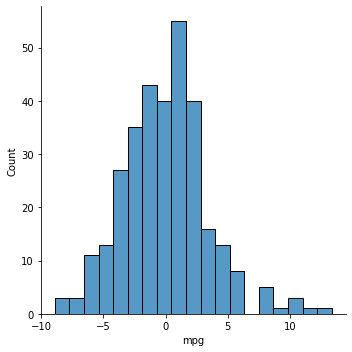

In [59]:
sns.displot(resid);

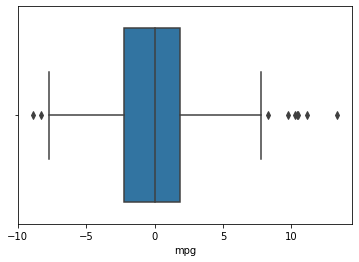

In [60]:
sns.boxplot(x=resid);

In [62]:
# RMSPE
def rmspe(y_train, y_train_pred):
    sum_of_squared_pct = 0
    n = len(y_train)
    
    for i in range(n):
        pct_squared = ((y_train[i] - y_train_pred[i]) / y_train[i]) ** 2
        sum_of_squared_pct += pct_squared
        
    rmspe_score = np.sqrt(sum_of_squared_pct / n)
    
    return rmspe_score

In [64]:
print('MSE:', mean_squared_error(y_train, y_train_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('MAE:', mean_absolute_error(y_train, y_train_pred))
print('MAPE:', mean_absolute_percentage_error(y_train, y_train_pred))
print('RMSLE', np.sqrt(mean_squared_log_error(y_train, y_train_pred)))
print(f'RMSPE: {rmspe(y_train.values, y_train_pred)}')

MSE: 11.54465644424832
RMSE: 3.3977428455149927
MAE: 2.5977057427126633
MAPE: 0.11931218493554197
RMSLE 0.1502802976032802
RMSPE: 0.15750905489540865
